<font size="+3.8">Foxf2 Expression per Cell Type</font>  
<font size="+1.5"></font>  

sfrerich

Aim: Combine and plot Foxf2 expression from processed scRNA-seq studies. Processing see separate scripts.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
from datetime import date
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
sc.settings.verbosity = 3

In [3]:
main_dir='/run/user/1000/gvfs/smb-share:server=138.245.4.35,share=bd-dichgans/SF' # Linux
main_dir='\\\isdsynnas.srv.med.uni-muenchen.de\BD-Dichgans\SF' # Win

# Foxf2

In [4]:
gene="Foxf2"

## Load data

In [5]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized' 
all_files = glob.glob(os.path.join(path , "*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230228_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230228_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230228_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230301_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230302_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230302_Garcia2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\20230309_TabulaMurisSenis2020_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen

In [6]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [7]:
all

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,ECs,0.291276,0.107273,FOXF2,Winkler2022,Human,4950
1,Fibroblasts,0.403376,0.153991,FOXF2,Winkler2022,Human,3721
2,Fibromyocytes,0.033961,0.021365,FOXF2,Winkler2022,Human,4353
3,Pericytes,1.000000,0.355623,FOXF2,Winkler2022,Human,329
4,SMCs,0.000000,0.010474,FOXF2,Winkler2022,Human,41150
...,...,...,...,...,...,...,...
115,ECs,1.000000,0.752618,Foxf2,Vanlandewijck2018,Mouse,1528
116,Fibroblasts,0.293552,0.476744,Foxf2,Vanlandewijck2018,Mouse,86
117,Oligos,0.000000,0.025806,Foxf2,Vanlandewijck2018,Mouse,155
118,Pericytes,0.853845,0.585478,Foxf2,Vanlandewijck2018,Mouse,1088


In [8]:
all.source.unique()

array(['Winkler2022', 'Zeisel2018', 'Yang2022', 'Saunders2018',
       'Siletti2022', 'Garcia2022', 'TabulaMurisSenis2020', 'Zhao2020',
       'Ximerakis2019', 'TabulaMuris2018', 'Heindl2022',
       'Vanlandewijck2018'], dtype=object)

In [9]:
all.gene.unique()

array(['FOXF2', 'Foxf2'], dtype=object)

In [10]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Olfactory ensheathing cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligos',
 'OPCs',
 'Leptomeningeal cells',
 'T cells',
 'Neurogenesis',
 'Choroid plexus epithelial cells',
 'Macrophages',
 'Microglia',
 'NK/T cells',
 'Neuroepithelial cells',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Hemoglobin-expressing vascular cells',
 'Immune_Other',
 'Hypendymal cells',
 'Neural stem cells',
 'Olfactory ensheathing glia',
 'VLMCs',
 'Unknown']

## Format

### Remove celltypes

In [11]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'VLMCs']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [12]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [13]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [14]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'OPCs',
 'Neurogenesis',
 'Macrophages',
 'Microglia',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

In [15]:
all = all.replace("Microglia","Microglia/Mφ")

In [16]:
all = all.replace("Macrophages","Microglia/Mφ")

In [17]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [18]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs',
 'Neurogenesis',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

### SMCs/Pericytes

In [19]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
69,SMCs/Pericytes,0.369789,0.390496,Foxf2,TabulaMurisSenis2020,Mouse,484


In [20]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Group Neuroblasts/Neuronal stem cells

In [21]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [22]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [23]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
11,Neuroblasts/NSCs,0.000000,0.000000,Foxf2,Zeisel2018,Mouse,5466
33,Neuroblasts/NSCs,0.001688,0.000499,Foxf2,Saunders2018,Mouse,4008
65,Neuroblasts/NSCs,0.018664,0.010309,Foxf2,TabulaMurisSenis2020,Mouse,97
89,Neuroblasts/NSCs,0.000000,0.000000,Foxf2,Ximerakis2019,Mouse,166


### Rename ECs

In [24]:
# rename ECs to Endothelial cells

In [25]:
all2 = all

In [26]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [27]:
all2.clusters.unique().tolist()

['Endothelial cells',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs']

In [28]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [29]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [30]:
all2 = all2.sort_values("clusters")

### Rename studies

In [31]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
105,Astrocytes,0.001149,0.001277,Foxf2,Heindl2022,Mouse,783
59,Astrocytes,0.000401,0.004644,Foxf2,TabulaMurisSenis2020,Mouse,646
17,Astrocytes,0.046944,0.001307,FOXF2,Yang2022,Human,9943
114,Astrocytes,0.000066,0.044000,Foxf2,Vanlandewijck2018,Mouse,250
5,Astrocytes,0.002439,0.000759,Foxf2,Zeisel2018,Mouse,19755
...,...,...,...,...,...,...,...
19,Ependymal cells,0.034462,0.002260,FOXF2,Yang2022,Human,885
72,Ependymal cells,0.019285,0.012449,Foxf2,Zhao2020,Mouse,3213
30,Ependymal cells,0.000000,0.000000,Foxf2,Saunders2018,Mouse,2022
61,Ependymal cells,0.000000,0.000000,Foxf2,TabulaMurisSenis2020,Mouse,55


In [32]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [33]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [34]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [35]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [36]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [37]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [38]:
all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

In [39]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [40]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [41]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [42]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [43]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [44]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [45]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


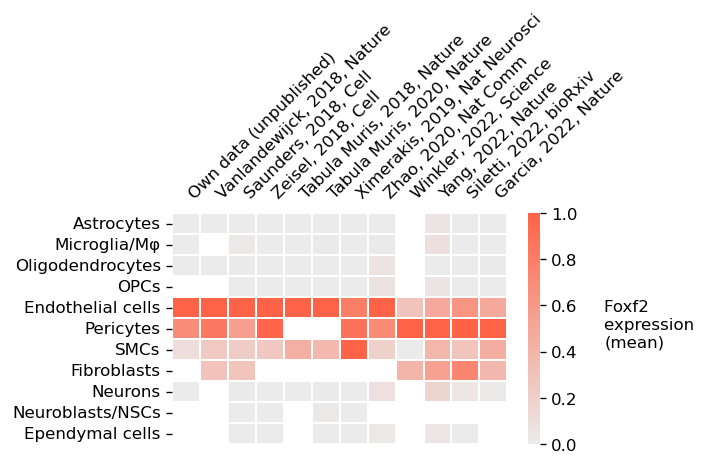

In [46]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [47]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [48]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [49]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [50]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(10,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

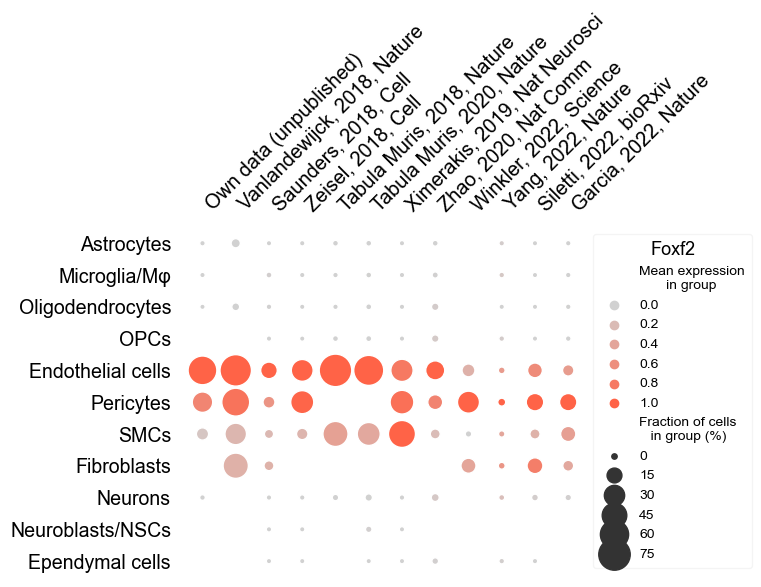

In [51]:
plt.show()

In [52]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_a.png', dpi=500)

In [53]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_a.svg', dpi=500)

In [54]:
# format legend as in sc.pl.dotplot()?

In [55]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(0, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(10,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

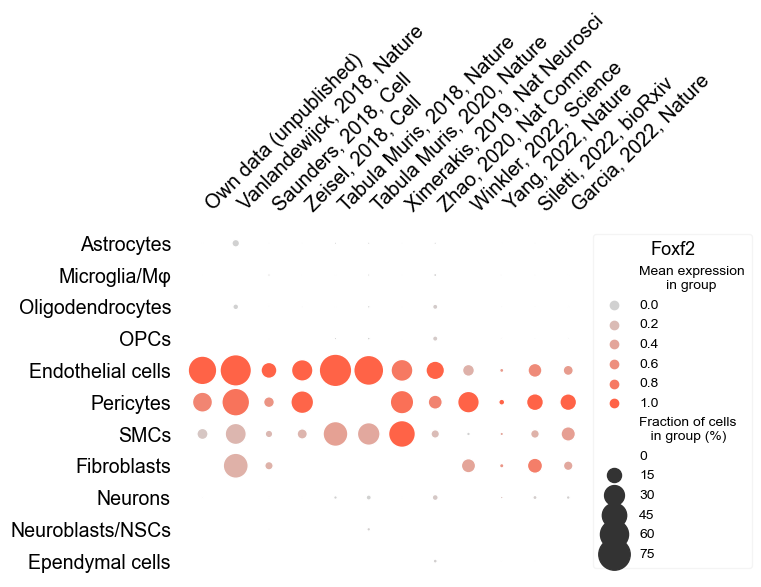

In [56]:
plt.show()

Plot shows no dot if fraction of cells is 0

In [57]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_b.png', dpi=500)

In [58]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_b.svg', dpi=500)

## Cell Numbers

In [59]:
# Format table
all5=all2.set_index(['clusters','source'])['cell_number'].unstack().reset_index() # unmelt
# change row order to represent groupings
all5.index = all5.clusters
all5=all5.reindex(list(all2.clusters.unique()))
all5=all5.drop("clusters",axis=1)
#all4.sort_values("clusters")
all5 = all5.fillna(0)
all5 = all5.astype(int)
# add marginal frequencies
all5.loc["Total"] = all5.sum(skipna=True)
all5['Total'] = all5[list(all5.columns)].sum(axis=1)
all5

source,Own data (unpublished),"Vanlandewijck, 2018, Nature","Saunders, 2018, Cell","Zeisel, 2018, Cell","Tabula Muris, 2018, Nature","Tabula Muris, 2020, Nature","Ximerakis, 2019, Nat Neurosci","Zhao, 2020, Nat Comm","Winkler, 2022, Science","Yang, 2022, Nature","Siletti, 2022, bioRxiv","Garcia, 2022, Nature",Total
clusters,,,,,,,,,,,,,
Astrocytes,783,250,51571,19755,433,646,6931,9642,0,9943,163066,11954,274974
Microglia/Mφ,1360,0,6129,6744,4365,13417,4287,12886,0,1142,91838,8164,150332
Oligodendrocytes,54,155,113209,26243,1186,2094,12384,236,0,8528,494966,29428,688483
OPCs,0,0,12252,733,202,312,2187,1745,0,1509,105734,5844,130518
Endothelial cells,338,1528,40105,2334,625,2232,2413,12357,4950,24982,5165,6561,103590
Pericytes,92,1088,5342,4156,0,0,735,642,329,17561,3693,4922,38560
SMCs,95,297,7667,1575,132,484,243,1425,41150,4669,1074,1039,59850
Fibroblasts,0,86,3993,0,0,0,0,0,3721,2032,9156,4147,23135
Neurons,753,0,399331,63512,196,827,5773,1417,0,933,2455885,23968,2952595


In [60]:
all5.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_number_of_cells.csv',sep=";")

In [61]:
del all
del all2
del all4
del all5

## Include AV zonation

### Load data

In [62]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230228_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230228_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230302_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230310_Foxf2_Zhao2020_incl_zonation.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230310_Vanlandewijck2018_incl_zonation.csv']

In [63]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [64]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Zhao2020',
       'Vanlandewijck2018'], dtype=object)

In [65]:
all.clusters2.unique().tolist()

['ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligos',
 'T cells',
 'Microglia',
 'aECs',
 'capECs',
 'vECs',
 'ECs_unclassified',
 'Hemoglobin-expressing vascular cells',
 'Immune_Other',
 'ECs_non_AV']

### Format

#### Remove celltypes

In [66]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'VLMCs']
all = all[all.clusters2 != 'Leptomeningeal cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [67]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [68]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [69]:
all = all.replace("ECs_Arterial","aECs")

In [70]:
all = all.replace("ECs_Capillary","capECs")

In [71]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [72]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [73]:
all = all.replace("Microglia","Microglia/Mφ")

In [74]:
all = all.replace("Macrophages","Microglia/Mφ")

In [75]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [76]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

#### Set order of axes

In [77]:
all2 = all

In [78]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [79]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])

In [80]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [81]:
all2 = all2.sort_values("clusters2")

#### Rename studies

In [82]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [83]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [84]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [85]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [86]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [87]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [88]:
all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

In [89]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [90]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [91]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [92]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [93]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

### Heatmap

In [94]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [95]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


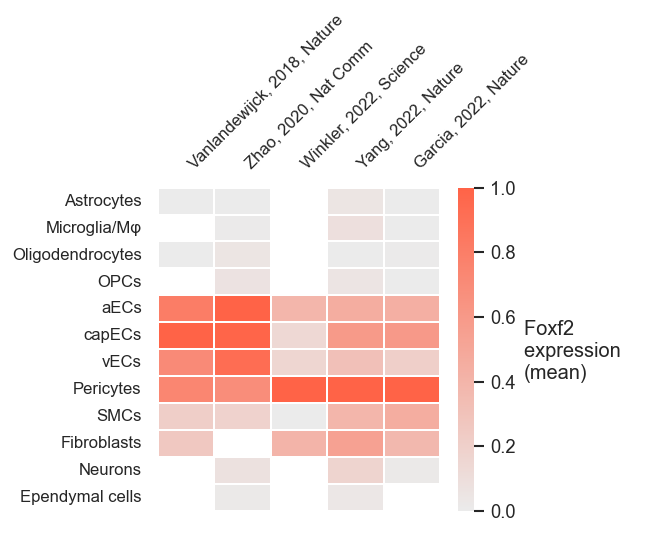

In [96]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [97]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [98]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [99]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [104]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

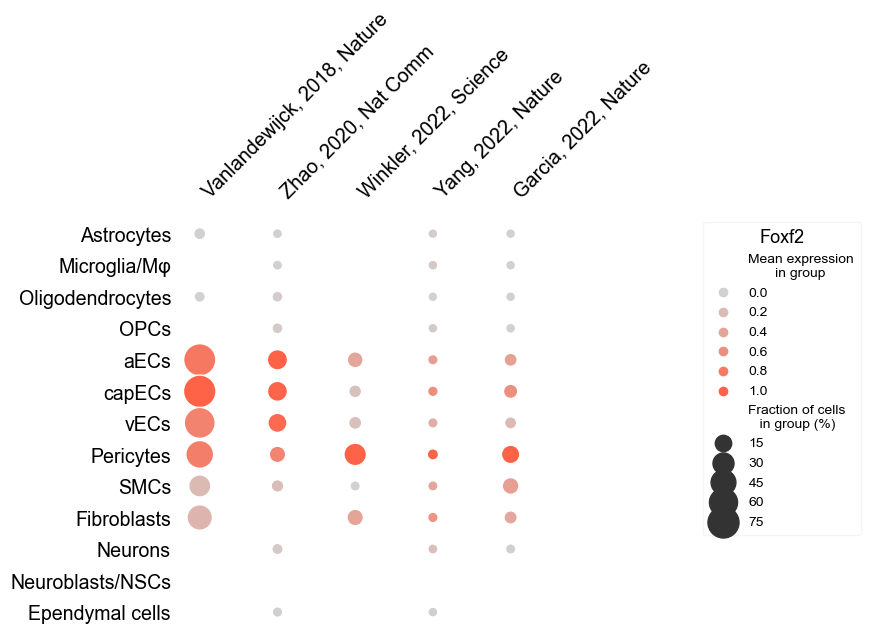

In [105]:
plt.show()

In [106]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_incl_AV_zonation.png', dpi=500)

In [107]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_incl_AV_zonation.svg', dpi=500)

## Cell Numbers

In [108]:
# Format table
all5=all2.set_index(['clusters','source'])['cell_number'].unstack().reset_index() # unmelt
# change row order to represent groupings
all5.index = all5.clusters
all5=all5.reindex(list(all2.clusters.unique()))
all5=all5.drop("clusters",axis=1)
#all4.sort_values("clusters")
all5 = all5.fillna(0)
all5 = all5.astype(int)
# add marginal frequencies
all5.loc["Total"] = all5.sum(skipna=True)
all5['Total'] = all5[list(all5.columns)].sum(axis=1)
all5

source,"Vanlandewijck, 2018, Nature","Zhao, 2020, Nat Comm","Winkler, 2022, Science","Yang, 2022, Nature","Garcia, 2022, Nature",Total
clusters,,,,,,
Astrocytes,250,9642,0,9943,11954,31789
Microglia/Mφ,0,12886,0,1142,8164,22192
Oligodendrocytes,155,236,0,8528,29428,38347
OPCs,0,1745,0,1509,5844,9098
aECs,397,3344,2886,4486,826,11939
capECs,405,6207,165,13357,4160,24294
vECs,298,1210,1899,7139,1575,12121
Pericytes,1088,642,329,17561,4932,24552
SMCs,297,1425,41150,4669,1029,48570


In [109]:
all5.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_number_of_cells_incl_AV_zonation.csv',sep=";")

In [110]:
del all
del all2
del all4
del all5
del all_files

# Other genes: Tek

In [111]:
gene = "Tek"

## Load data

In [190]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Tek_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_TEK_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_TEK_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Tek_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_TEK_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_TEK_Garcia2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230309_Tek_Tabu

In [191]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [192]:
all.source.unique()

array(['Zeisel2018', 'Winkler2022', 'Yang2022', 'Saunders2018',
       'Siletti2022', 'Garcia2022', 'TabulaMurisSenis2020', 'Zhao2020',
       'Ximerakis2019', 'Heindl2022', 'Vanlandewijck2018',
       'TabulaMuris2018'], dtype=object)

In [193]:
all.gene.unique()

array(['Tek', 'TEK'], dtype=object)

## Format

### Remove celltypes

In [194]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'VLMCs']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [195]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [196]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [197]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'ECs',
 'Fibroblasts',
 'Neurogenesis',
 'Macrophages',
 'Microglia',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

In [198]:
all = all.replace("Microglia","Microglia/Mφ")

In [199]:
all = all.replace("Macrophages","Microglia/Mφ")

In [200]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [201]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'ECs',
 'Fibroblasts',
 'Neurogenesis',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

### SMCs/Pericytes

In [202]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
69,SMCs/Pericytes,0.075376,0.088843,Tek,TabulaMurisSenis2020,Mouse,484


In [203]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Group Neuroblasts/Neuronal stem cells

In [204]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [205]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [206]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
6,Neuroblasts/NSCs,0.000221,0.000549,Tek,Zeisel2018,Mouse,5466
33,Neuroblasts/NSCs,0.000000,0.000499,Tek,Saunders2018,Mouse,4008
65,Neuroblasts/NSCs,0.000000,0.000000,Tek,TabulaMurisSenis2020,Mouse,97
89,Neuroblasts/NSCs,0.000000,0.000000,Tek,Ximerakis2019,Mouse,166


### Rename ECs

In [207]:
# rename ECs to Endothelial cells

In [208]:
all2 = all

In [209]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [210]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Fibroblasts']

In [211]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [212]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [213]:
all2 = all2.sort_values("clusters")

### Rename studies

In [214]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.002218,0.001063,Tek,Zeisel2018,Mouse,19755
106,Astrocytes,0.000000,0.132000,Tek,Vanlandewijck2018,Mouse,250
97,Astrocytes,0.000603,0.001277,Tek,Heindl2022,Mouse,783
81,Astrocytes,0.001154,0.000866,Tek,Ximerakis2019,Mouse,6931
70,Astrocytes,0.014114,0.012549,Tek,Zhao2020,Mouse,9642
...,...,...,...,...,...,...,...
42,Ependymal cells,0.017392,0.025502,TEK,Siletti2022,Human,5882
72,Ependymal cells,0.026775,0.020542,Tek,Zhao2020,Mouse,3213
84,Ependymal cells,0.007038,0.003650,Tek,Ximerakis2019,Mouse,274
30,Ependymal cells,0.001852,0.002473,Tek,Saunders2018,Mouse,2022


In [215]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [216]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [217]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [218]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [219]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [220]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [221]:
all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

In [222]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [223]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [224]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [225]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [226]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [227]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [228]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


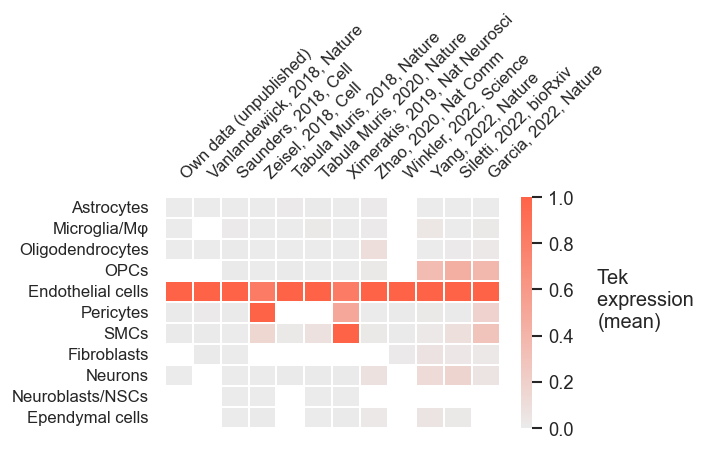

In [229]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [230]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [231]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [232]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [233]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(10,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

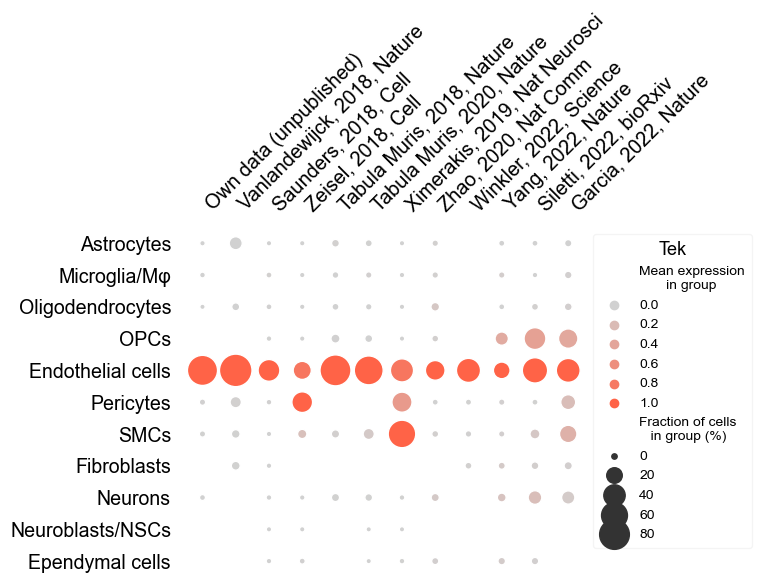

In [234]:
plt.show()

In [235]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [236]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

In [237]:
del all
del all2
del all4

## Include AV zonation

### Load data

In [239]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_TEK_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_TEK_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230302_TEK_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Tek_Zhao2020_incl_zonation.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Tek_Vanlandewijck2018_incl_zonation.csv']

In [240]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [241]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Zhao2020',
       'Vanlandewijck2018'], dtype=object)

In [242]:
all.clusters2.unique().tolist()

['ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligos',
 'T cells',
 'Microglia',
 'aECs',
 'capECs',
 'vECs',
 'ECs_unclassified',
 'Hemoglobin-expressing vascular cells',
 'Immune_Other',
 'ECs_non_AV']

### Format

#### Remove celltypes

In [243]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'VLMCs']
all = all[all.clusters2 != 'Leptomeningeal cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [244]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [245]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [246]:
all = all.replace("ECs_Arterial","aECs")

In [247]:
all = all.replace("ECs_Capillary","capECs")

In [248]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [249]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [250]:
all = all.replace("Microglia","Microglia/Mφ")

In [251]:
all = all.replace("Macrophages","Microglia/Mφ")

In [252]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [253]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

#### Set order of axes

In [254]:
all2 = all

In [255]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [256]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])

In [257]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [258]:
all2 = all2.sort_values("clusters2")

#### Rename studies

In [259]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [260]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [261]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [262]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [263]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [264]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [265]:
all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

In [266]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [267]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [268]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [269]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [270]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

### Heatmap

In [271]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [272]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


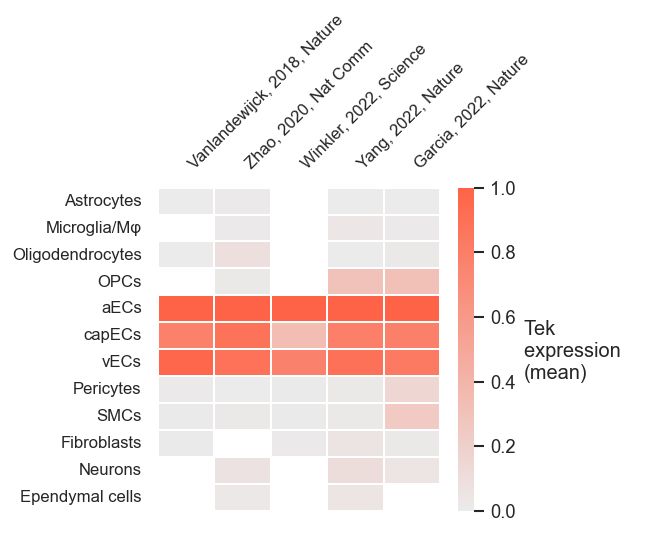

In [273]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [274]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [275]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [276]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [277]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

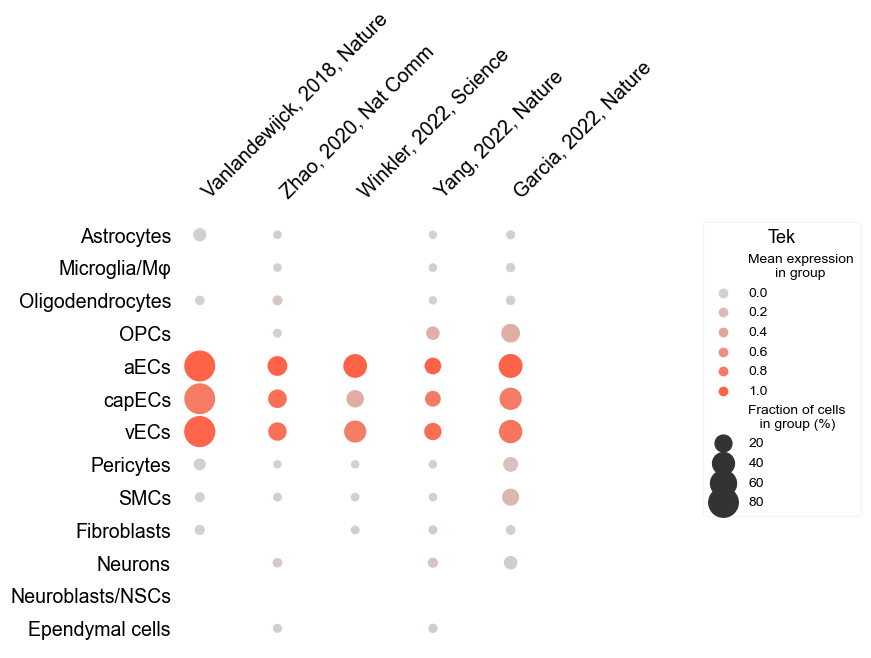

In [278]:
plt.show()

In [279]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [280]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

In [281]:
del all
del all2
del all4
del all_files

# Other genes: Foxo1

In [282]:
gene = "Foxo1"

## Load data

In [283]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_FOXO1_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Foxo1_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_FOXO1_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_FOXO1_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Foxo1_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_FOXO1_Garcia2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230

In [284]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [285]:
all.source.unique()

array(['Winkler2022', 'Zeisel2018', 'Yang2022', 'Siletti2022',
       'Saunders2018', 'Garcia2022', 'TabulaMurisSenis2020', 'Zhao2020',
       'Ximerakis2019', 'Heindl2022', 'Vanlandewijck2018',
       'TabulaMuris2018'], dtype=object)

In [286]:
all.gene.unique()

array(['FOXO1', 'Foxo1'], dtype=object)

## Format

### Remove celltypes

In [287]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'VLMCs']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [288]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [289]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [290]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'OPCs',
 'Macrophages',
 'Neurogenesis',
 'Microglia',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

In [291]:
all = all.replace("Microglia","Microglia/Mφ")

In [292]:
all = all.replace("Macrophages","Microglia/Mφ")

In [293]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [294]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs',
 'Neurogenesis',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

### SMCs/Pericytes

In [295]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
69,SMCs/Pericytes,0.203936,0.239669,Foxo1,TabulaMurisSenis2020,Mouse,484


In [296]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Group Neuroblasts/Neuronal stem cells

In [297]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [298]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [299]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
11,Neuroblasts/NSCs,0.032349,0.039517,Foxo1,Zeisel2018,Mouse,5466
44,Neuroblasts/NSCs,0.055644,0.027944,Foxo1,Saunders2018,Mouse,4008
65,Neuroblasts/NSCs,0.256633,0.319588,Foxo1,TabulaMurisSenis2020,Mouse,97
89,Neuroblasts/NSCs,0.557858,0.283133,Foxo1,Ximerakis2019,Mouse,166


### Rename ECs

In [300]:
# rename ECs to Endothelial cells

In [301]:
all2 = all

In [302]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [303]:
all2.clusters.unique().tolist()

['Endothelial cells',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs']

In [304]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [305]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [306]:
all2 = all2.sort_values("clusters")

### Rename studies

In [307]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
119,Astrocytes,0.894740,0.572748,Foxo1,TabulaMuris2018,Mouse,433
39,Astrocytes,0.892455,0.140059,Foxo1,Saunders2018,Mouse,51571
50,Astrocytes,0.757857,0.623641,FOXO1,Garcia2022,Human,11954
5,Astrocytes,0.269911,0.089344,Foxo1,Zeisel2018,Mouse,19755
106,Astrocytes,0.493353,0.308000,Foxo1,Vanlandewijck2018,Mouse,250
...,...,...,...,...,...,...,...
72,Ependymal cells,0.243481,0.055711,Foxo1,Zhao2020,Mouse,3213
19,Ependymal cells,0.369467,0.281356,FOXO1,Yang2022,Human,885
84,Ependymal cells,0.537096,0.375912,Foxo1,Ximerakis2019,Mouse,274
6,Ependymal cells,0.635456,0.288231,Foxo1,Zeisel2018,Mouse,1419


In [308]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [309]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [310]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [311]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [312]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [313]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [314]:
all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

In [315]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [316]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [317]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [318]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [319]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [320]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [321]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


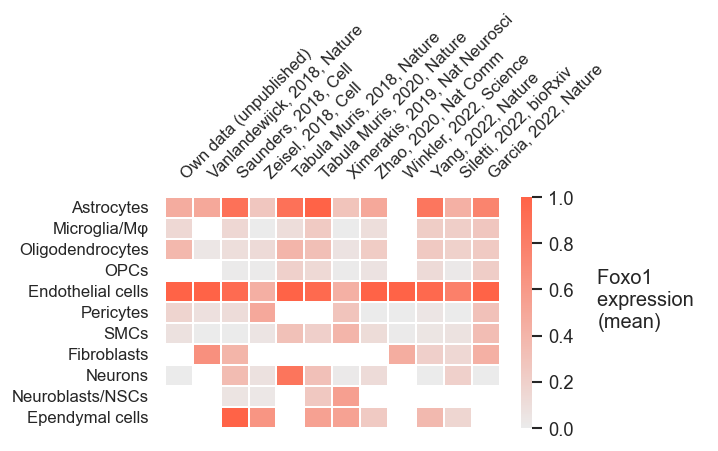

In [322]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [323]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [324]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [325]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [326]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(10,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

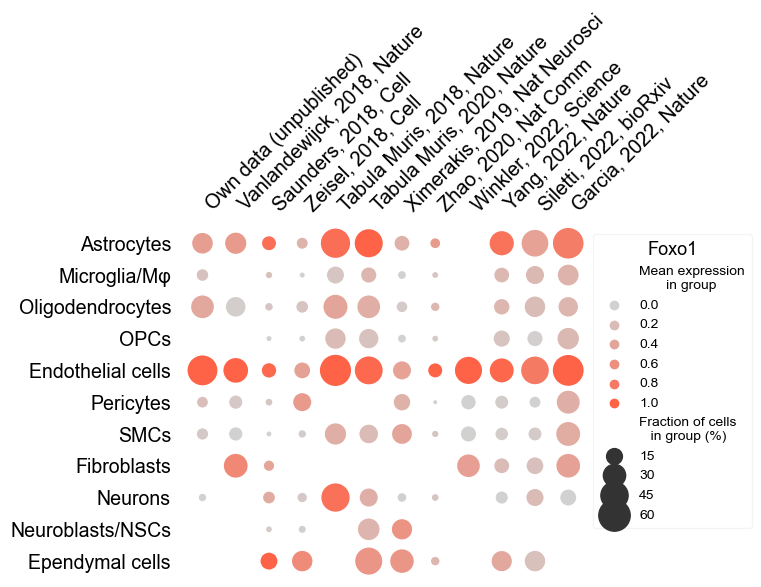

In [327]:
plt.show()

In [328]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [329]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [330]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_FOXO1_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_FOXO1_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230302_FOXO1_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Foxo1_Zhao2020_incl_zonation.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Foxo1_Vanlandewijck2018_incl_zonation.csv']

In [331]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [332]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Zhao2020',
       'Vanlandewijck2018'], dtype=object)

In [333]:
all.gene.unique()

array(['FOXO1', 'Foxo1'], dtype=object)

In [334]:
all.clusters2.unique().tolist()

['ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligos',
 'T cells',
 'Microglia',
 'aECs',
 'capECs',
 'vECs',
 'ECs_unclassified',
 'Hemoglobin-expressing vascular cells',
 'Immune_Other',
 'ECs_non_AV']

### Format

#### Remove celltypes

In [335]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'VLMCs']
all = all[all.clusters2 != 'Leptomeningeal cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [336]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [337]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [338]:
all = all.replace("ECs_Arterial","aECs")

In [339]:
all = all.replace("ECs_Capillary","capECs")

In [340]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [341]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [342]:
all = all.replace("Microglia","Microglia/Mφ")

In [343]:
all = all.replace("Macrophages","Microglia/Mφ")

In [344]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [345]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [348]:
all2 = all

#### Set order of axes

In [349]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [350]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])

In [351]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [352]:
all2 = all2.sort_values("clusters2")

#### Rename studies

In [353]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [354]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [355]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [356]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [357]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [358]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [359]:
all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

In [360]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [361]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [362]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [363]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [364]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

### Heatmap

In [365]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [366]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


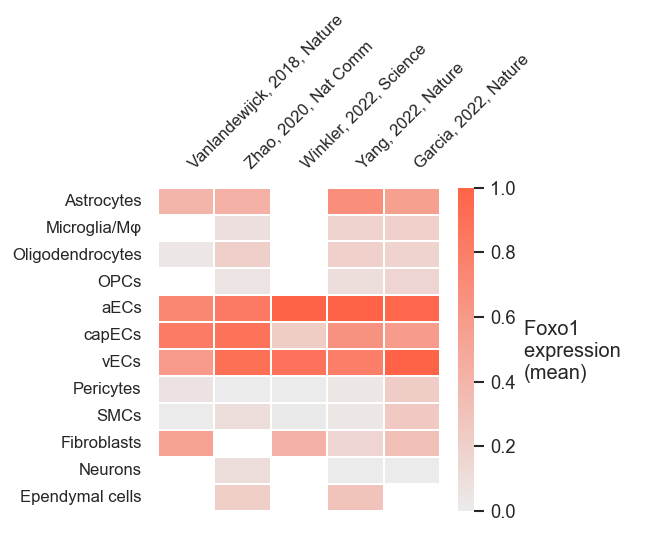

In [367]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [368]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [369]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [370]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [371]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

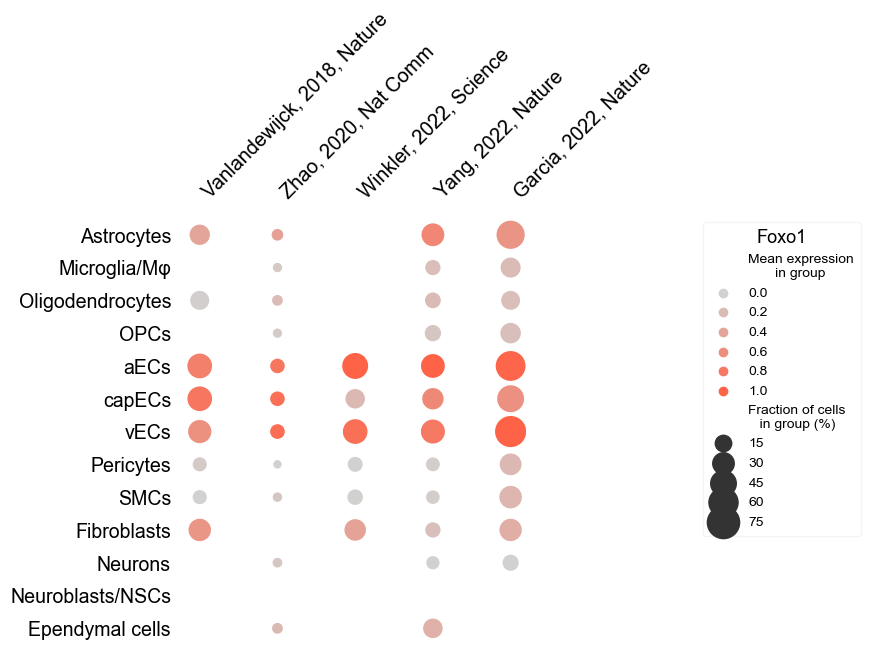

In [372]:
plt.show()

In [373]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [374]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

In [375]:
del all
del all2
del all4
del all_files

# Other genes: Nos3

In [376]:
gene="Nos3"

## Load data

In [377]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Nos3_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_NOS3_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_NOS3_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Nos3_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_NOS3_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_NOS3_Garcia2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230309_No

In [378]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [379]:
all.source.unique()

array(['Zeisel2018', 'Winkler2022', 'Yang2022', 'Saunders2018',
       'Siletti2022', 'Garcia2022', 'TabulaMurisSenis2020', 'Zhao2020',
       'Ximerakis2019', 'Heindl2022', 'Vanlandewijck2018',
       'TabulaMuris2018'], dtype=object)

In [380]:
all.gene.unique()

array(['Nos3', 'NOS3'], dtype=object)

## Format

### Remove celltypes

In [381]:
# remove celltypes which are only available in 1 group
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'VLMCs']
all = all[all.clusters != 'Leptomeningeal cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [382]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [383]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [384]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'ECs',
 'Fibroblasts',
 'Neurogenesis',
 'Macrophages',
 'Microglia',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

In [385]:
all = all.replace("Microglia","Microglia/Mφ")

In [386]:
all = all.replace("Macrophages","Microglia/Mφ")

In [387]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [388]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'ECs',
 'Fibroblasts',
 'Neurogenesis',
 'Neuronal stem cells',
 'SMCs/Pericytes',
 'Neural stem cells']

### SMCs/Pericytes

In [389]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
69,SMCs/Pericytes,0.096688,0.10124,Nos3,TabulaMurisSenis2020,Mouse,484


In [390]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Group Neuroblasts/Neuronal stem cells

In [391]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [392]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [393]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
6,Neuroblasts/NSCs,0.039580,0.010062,Nos3,Zeisel2018,Mouse,5466
33,Neuroblasts/NSCs,0.017165,0.003743,Nos3,Saunders2018,Mouse,4008
65,Neuroblasts/NSCs,0.001044,0.030928,Nos3,TabulaMurisSenis2020,Mouse,97
89,Neuroblasts/NSCs,0.040680,0.018072,Nos3,Ximerakis2019,Mouse,166


### Rename ECs

In [394]:
# rename ECs to Endothelial cells

In [395]:
all2 = all

In [396]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [397]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Fibroblasts']

In [398]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [399]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [400]:
all2 = all2.sort_values("clusters")

### Rename studies

In [401]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.038204,0.006581,Nos3,Zeisel2018,Mouse,19755
106,Astrocytes,0.000000,0.056000,Nos3,Vanlandewijck2018,Mouse,250
97,Astrocytes,0.031923,0.024266,Nos3,Heindl2022,Mouse,783
81,Astrocytes,0.020833,0.008945,Nos3,Ximerakis2019,Mouse,6931
70,Astrocytes,0.012621,0.009438,Nos3,Zhao2020,Mouse,9642
...,...,...,...,...,...,...,...
42,Ependymal cells,0.038575,0.014111,NOS3,Siletti2022,Human,5882
72,Ependymal cells,0.140457,0.041706,Nos3,Zhao2020,Mouse,3213
84,Ependymal cells,0.171545,0.098540,Nos3,Ximerakis2019,Mouse,274
30,Ependymal cells,0.093670,0.022750,Nos3,Saunders2018,Mouse,2022


In [402]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [403]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [404]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [405]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [406]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [407]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [408]:
all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

In [409]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [410]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [411]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [412]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [413]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

## Heatmap

In [414]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [415]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


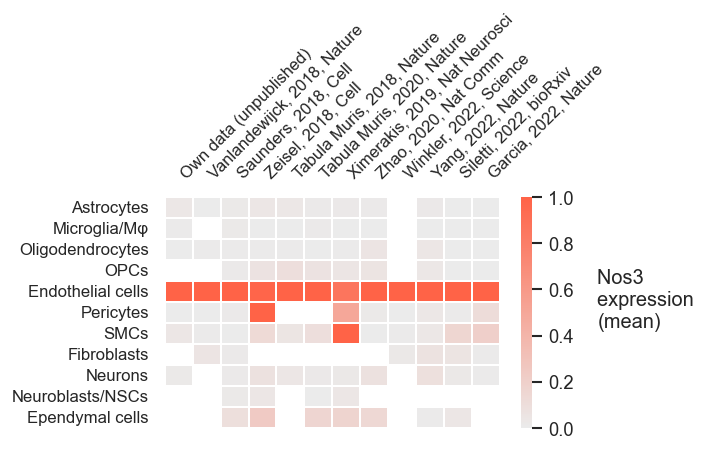

In [416]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [417]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [418]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [419]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [420]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(10,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

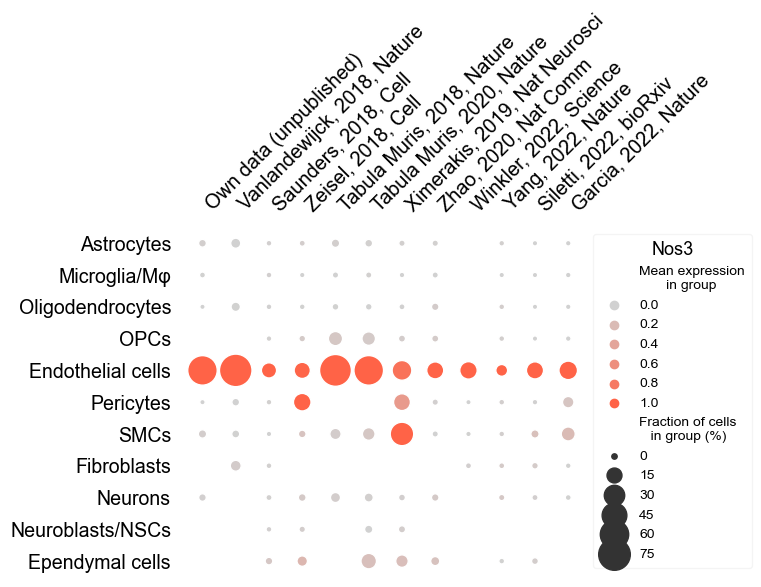

In [421]:
plt.show()

In [422]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [423]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [424]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_NOS3_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_NOS3_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230302_NOS3_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Nos3_Zhao2020_incl_zonation.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Nos3_Vanlandewijck2018_incl_zonation.csv']

In [425]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [426]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Zhao2020',
       'Vanlandewijck2018'], dtype=object)

In [427]:
all.gene.unique()

array(['NOS3', 'Nos3'], dtype=object)

In [428]:
all.clusters2.unique().tolist()

['ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligos',
 'T cells',
 'Microglia',
 'aECs',
 'capECs',
 'vECs',
 'ECs_unclassified',
 'Hemoglobin-expressing vascular cells',
 'Immune_Other',
 'ECs_non_AV']

### Format

#### Remove celltypes

In [429]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'VLMCs']
all = all[all.clusters2 != 'Leptomeningeal cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [430]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [431]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [432]:
all = all.replace("ECs_Arterial","aECs")

In [433]:
all = all.replace("ECs_Capillary","capECs")

In [434]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [435]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [436]:
all = all.replace("Microglia","Microglia/Mφ")

In [437]:
all = all.replace("Macrophages","Microglia/Mφ")

In [438]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [439]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [440]:
all2 = all

#### Set order of axes

In [441]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [442]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])

In [443]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [444]:
all2 = all2.sort_values("clusters2")

#### Rename studies

In [445]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [446]:
all2 = all2.replace("Heindl2022","Own data (unpublished)")

In [447]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [448]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [449]:
all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")

In [450]:
all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")

In [451]:
all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

In [452]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [453]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [454]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [455]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [456]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

### Heatmap

In [457]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [458]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


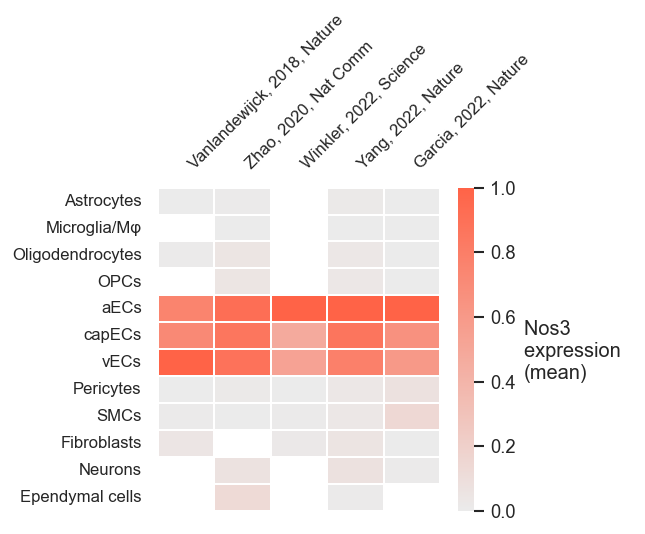

In [459]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [460]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_12248\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [461]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [462]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [463]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

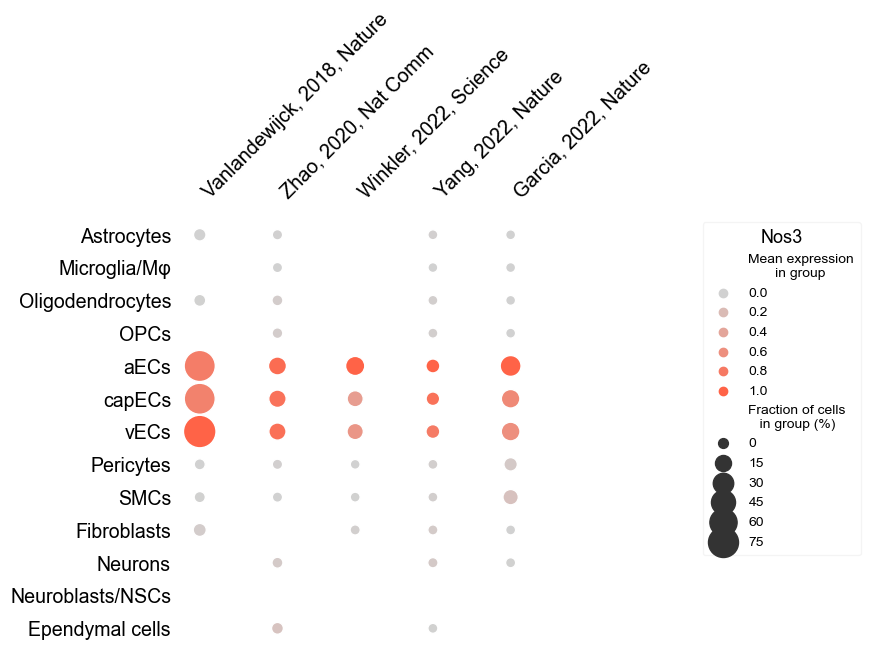

In [464]:
plt.show()

In [465]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [466]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Session Info

In [467]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asciitree                   NA
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.5
cffi                        1.15.1
cloudpickle                 2.0.0
colorama                    0.4.5
cycler                      0.10.0
cython_runtime              NA
dask                        2022.05.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
fasteners                   0.17.3
fsspec                      2022.3.0
h5py                        3.6.0
hypergeom_ufunc             NA
igraph                      0.9.10
ipykernel                   6.15.2
ipython_genutils            0.2.0
ipywidgets                  7.7.0
jedi                        0.18.1
jinja2 

---
# Export HTML

In [ ]:
# Use nbconvert conda env
! cp combine_foxf2_results.ipynb HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb # rename in temp copy
! jupyter nbconvert HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb --to html_toc # export
! rm HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb # delete temp copy

# Outdated

### Merge EC zonation

In [231]:
# Outdated. Previously used to calculate weighted mean expression on ECs based on data from ECs split into zonation clusters. Now zonation clusters were merged already in anndata object, which is more accurate.

In [232]:
# merge EC zonation as weighted mean expression 
# in Yang2022 Winkler2022 Vanlandewijck2018

In [233]:
#Vanlandewijck2018 = all[all.source == "Vanlandewijck2018"]
#Vanlandewijck2018

In [234]:
# rename
#Vanlandewijck2018["clusters"] = Vanlandewijck2018.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Vanlandewijck2018

In [235]:
#Winkler2022 = all[all.source == "Winkler2022"]
#Winkler2022

In [236]:
# rename
#Winkler2022["clusters"] = Winkler2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Winkler2022

In [237]:
# Yang2022 = all[all.source == "Yang2022"]
# Yang2022

In [238]:
# Yang2022["clusters"] = Yang2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
# Yang2022

In [239]:
# remove original rows, then append new ones

In [240]:
# all.loc[Yang2022.index[0]:Yang2022.index[-1],:] = None
# all.loc[Winkler2022.index[0]:Winkler2022.index[-1],:] = None
# all.loc[Vanlandewijck2018.index[0]:Vanlandewijck2018.index[-1],:] = None
# all = all.dropna()

In [241]:
# compute new rows via weighted mean

In [242]:
# wm = lambda x: np.average(x, weights=Yang2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Yang2022_weighted_mean = Yang2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Yang2022_weighted_mean=Yang2022_weighted_mean.reset_index()[Yang2022.columns]
# Yang2022_weighted_mean

Contains correct weighted mean of mean_expression and fraction_of_cell (double checked)

In [243]:
# wm = lambda x: np.average(x, weights=Vanlandewijck2018.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Vanlandewijck2018_weighted_mean = Vanlandewijck2018.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Vanlandewijck2018_weighted_mean=Vanlandewijck2018_weighted_mean.reset_index()[Vanlandewijck2018.columns]
# Vanlandewijck2018_weighted_mean

In [244]:
# wm = lambda x: np.average(x, weights=Winkler2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Winkler2022_weighted_mean = Winkler2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Winkler2022_weighted_mean=Winkler2022_weighted_mean.reset_index()[Winkler2022.columns]
# Winkler2022_weighted_mean

In [245]:
# # append to all
# all2 = pd.concat([all, Winkler2022_weighted_mean, Yang2022_weighted_mean, Vanlandewijck2018_weighted_mean], axis=0)
# all2 = all2.reset_index().drop("index",axis=1)

### Complement missing celltypes 

In [106]:
# complement missing celltypes as NA rows

In [107]:
# all_celltypes = pd.Series(all2.clusters.unique())
# for s in all2.source.unique():
#     # find cell types missing per source
#     key_diff = set(all_celltypes).difference(all2[all2.source==s].clusters)
#     where_diff = all_celltypes.isin(key_diff)
#     missing_celltypes=all_celltypes[where_diff]
#     # append these to all2 as NA row
#     for m in missing_celltypes:
#         all2.loc[len(all2)] = [m,None,None,None,s,None,None]

# assert(len(all2) == len(all2.clusters.unique())*len(all2.source.unique()))